In [28]:
import pandas as pd
data =pd.read_csv("https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/refs/heads/master/adult.csv")
data =data[data!='?']  #მოვაშოროთ კითხვის ნიშნები
data.dropna(axis=0,inplace=True)  #ცარიელი სიმრავლეების მოშორება
data['income'] =data['income'].map({"<=50K":0,">50K":1})  #დამოკიდებული სვეტის  კონვერტირება  რიცხვებში
print(data.head())

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
5   34    Private  198693          10th                6       Never-married   

          occupation   relationship   race gender  capital-gain  capital-loss  \
0  Machine-op-inspct      Own-child  Black   Male             0             0   
1    Farming-fishing        Husband  White   Male             0             0   
2    Protective-serv        Husband  White   Male             0             0   
3  Machine-op-inspct        Husband  Black   Male          7688             0   
5      Other-service  Not-in-family  White   Male             0             0   

   hours-per-week native-country

In [29]:
work_class =pd.get_dummies(data['workclass']).astype(int)
new_data =pd.concat([data,work_class],axis=1)
new_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,hours-per-week,native-country,income,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,40,United-States,0,0,0,1,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,50,United-States,0,0,0,1,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,40,United-States,1,0,1,0,0,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,40,United-States,1,0,0,1,0,0,0,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,30,United-States,0,0,0,1,0,0,0,0


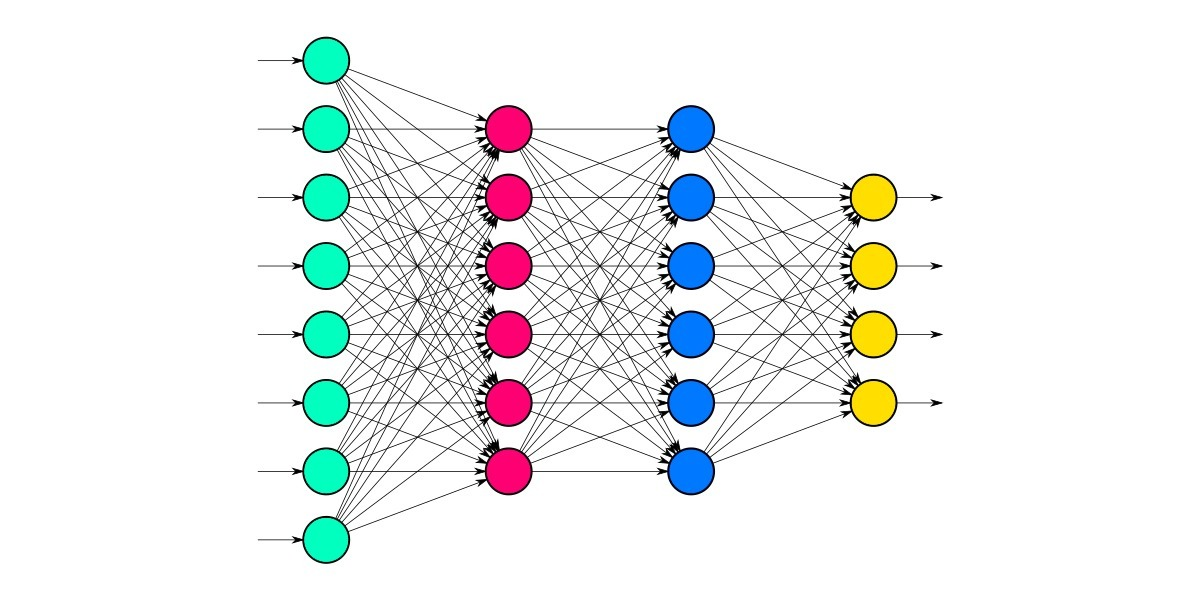

In [30]:
#ნეირონული ქსელისთვის ვიყენებთ კერას ის ბიბლიოთეკას, რომელიც შესაძლებლობას მაძლევს ერთმანეთის მიყოლებით შერეები ავაგო,
#რასაც ჰქვია მიმდევრობითი მოდელი  და შრეების რაოდენობა და თვითოეულ შრეში წიბოების რაოდენობა  განსაზღვრავს მოდელის უნარს
# რაც შეიძლება რთული  ურთიერთ მიმართება ამოიცნოს დამოუკიდებელ და დამოკიდებულ ცვლადებს შორის
from keras.src.models import Sequential  #ეს  ნიშნავს  მიმდევრობითს
from keras.src.layers import Dense   #ეს ნიშნავს  მკვრივს ანუ ყველა შრე ყველა შრესთან არის დაკავშირებული უწყვეტად
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
#ამოცანის მიზანი არის გარკვეული კრიტერიუმების მეშვეობით ხელფასის კლასიფიკაცია ნეირონული ქსელის მოდელით
y=data['income'].values
X =data[['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']].values
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)
#მოვახდინოთ მონაცემთა სკალირება  MinMaxScaler ის გამოყენებით
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

#მოდელის შექმნა
model =Sequential()
model.add(Dense(units=100,activation='relu',input_dim =X_train.shape[1]))  #ჩვენ გვაქვს 1 შრიანი ნეირონული ქსელი
#რომლის შემავალი წიბოების რაოდენობა უდრის X_train.shape[1] ანუ რამდენი სვეტია ცხრილში  და  ეს  ყველა
#შემავალი  სვეტი უკავშირდებ 100 წიბოს , მაგალითად ჩვენს შემთხვევაში გვაქვს  6  სვეტი და  გვექნება  6*100+100 =700  პარამეტრს
model.add(Dense(units=1,activation='sigmoid'))  #საბოლოოდ გვინდა 1 პასუხის კლასიფიკაცია  და ამისთვის ვითვლით
#ალბათობებს
#გავუკეთოთ მოდელს კომპილაცია
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
#optimizer  წარმოადგენ კალკულის პროცედურას თუ როგორ განაახლოს მოდელის წონები და sgd  იკითხება როგორც
#stochastic(შემთხვევითი) gradient(წარმოებული)  #descent(დაშვება),იხილეთ ქვევით სურათი

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


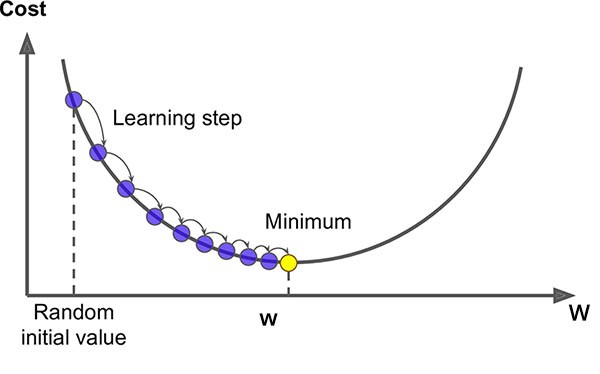

In [31]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
X.shape

(45222, 6)

In [ ]:
model.fit(X_train,y_train,batch_size=30,epochs=100,validation_data =(X_test,y_test),verbose=1)
#batch_size  გამოიყენება როცა ჩვენ გვინდა პატარ-პატარა პროპროციებით მოვახდინოთ
#მოდელის დატრენინგება(როცა მეხსიერება არაა საკმარისი) ხოლო epochs არის ციკლი რა დროის განმავლობაშიც
#მოხდება წონების განახლება


Epoch 1/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7162 - loss: 0.6006 - val_accuracy: 0.7527 - val_loss: 0.5537
Epoch 2/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7548 - loss: 0.5462 - val_accuracy: 0.7527 - val_loss: 0.5331
Epoch 3/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7508 - loss: 0.5285 - val_accuracy: 0.7542 - val_loss: 0.5100
Epoch 4/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7565 - loss: 0.5020 - val_accuracy: 0.7665 - val_loss: 0.4896
Epoch 5/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7673 - loss: 0.4818 - val_accuracy: 0.7767 - val_loss: 0.4720
Epoch 6/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7782 - loss: 0.4652 - val_accuracy: 0.7807 - val_loss: 0.4591
Epoch 7/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7810 - loss: 0.4576 - val_accuracy: 0.7875 - val_loss: 0.4511
Epoch 8/100
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7891 - loss: 0

In [ ]:
model.predict()

In [ ]:
data['education'].unique()